# Practical Project 

The aim of this project is to solve various forms of the portfolio optimization problem through Julia/computer software. This program template will provide hints/template code for you to focus on the optimization formulation part.

As usual, we first need to load a few packages in Julia.

In [1]:
# Load the JuMP related packages and several solvers
# ECOS - for solving SOCP problems
# GLPK - for solving IP/LP problems
using JuMP, ECOS, GLPK, LinearAlgebra
# Load the data/file processing related packages
using CSV, Glob, DataFrames, Statistics
# Load the Plot package for illustrating the solution
using Plots
# Load the custom functions for benchmarking  
include("./reusablefunc.jl");

## Part I - Compulsory Task

#### Data Preprocessing
The first step is to load the raw data into the memory. To do so, we can directly apply the codes demonstrated during the computing lab as follows.

In [2]:
path_subgroup = "./ftec_project_subgroup5/"
files = glob( "*_train.csv", path_subgroup );
dfs = DataFrame.( CSV.File.( files ) );

In [3]:
T = 50; n = length(dfs);
stocks_retur = zeros(T,n);
for i = 1:n
    # compute the realized return R_i(t)
    # we scale up the return 100 times
    stocks_retur[:,i] = (dfs[i].Close-dfs[i].Open) ./ dfs[i].Open*100;
end
names_stocks = [ dfs[i].Name[1] for i in 1:n ];

## Task 4: Warm-up Exercise

For part (a) of this task, you have to plot the return of 3-4 stocks over time. An example is provided for you as follows. Use "Insert" -> "Insert Cell Below/After" if you want to keep the plots together.

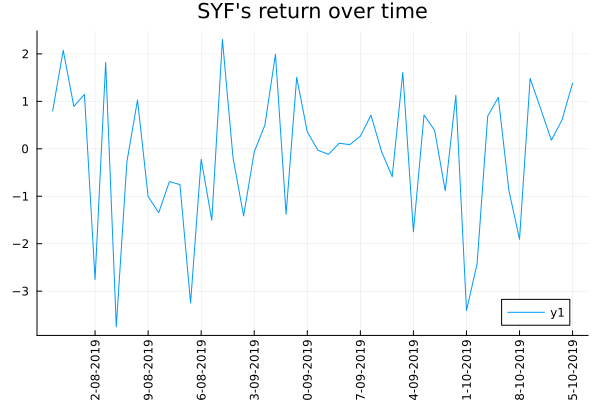

In [4]:
stock_id = 5; # You may change this stock_id to different numbers from 1 to 20

plot( dfs[stock_id].Date, stocks_retur[:,stock_id] , title = dfs[stock_id].Name[1]*"'s return over time" ,xrotation = 90)

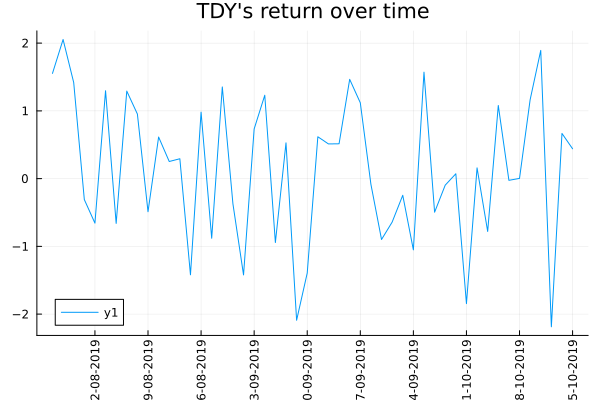

In [5]:
stock_id = 8; # You may change this stock_id to different numbers from 1 to 20

plot( dfs[stock_id].Date, stocks_retur[:,stock_id] , title = dfs[stock_id].Name[1]*"'s return over time" ,xrotation = 90)

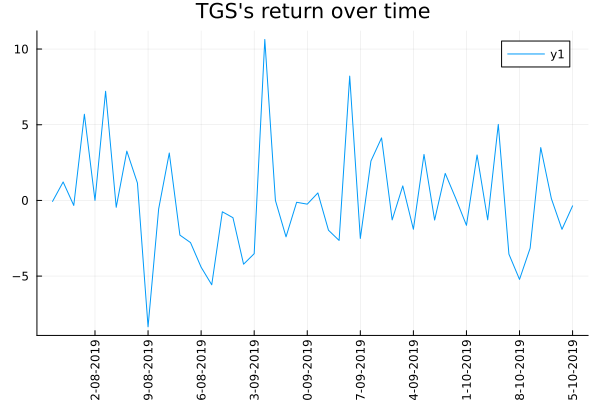

In [6]:
stock_id = 11; # You may change this stock_id to different numbers from 1 to 20

plot( dfs[stock_id].Date, stocks_retur[:,stock_id] , title = dfs[stock_id].Name[1]*"'s return over time" ,xrotation = 90)

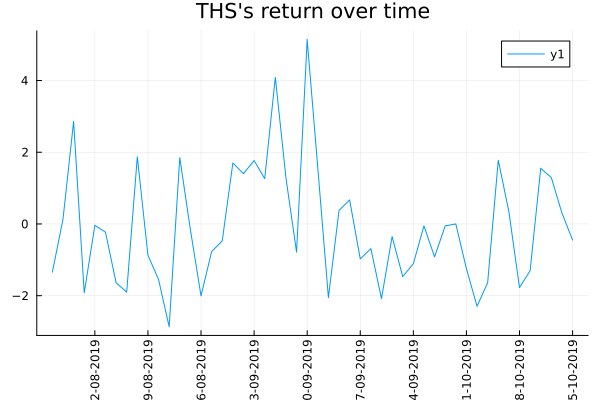

In [7]:
stock_id = 15; # You may change this stock_id to different numbers from 1 to 20

plot( dfs[stock_id].Date, stocks_retur[:,stock_id] , title = dfs[stock_id].Name[1]*"'s return over time" ,xrotation = 90)

For part (b) of this task, we need to estimate the expected return $\hat{r}_i$ and covariance $\hat\rho_{ij}$. Notice that these terms are given by (1.3) in the project specification. For your convenience, they have been calculated as follows:

In [8]:
# calculate r_i and Sigma
bar_R = [ mean( stocks_retur[:,i] ) for i in 1:n ]; ## The mean return over time of each stock
Sigma = [ mean( (stocks_retur[:,i].-bar_R[i]).*(stocks_retur[:,j].-bar_R[j]) ) for i=1:n, j=1:n ];  # covariance matrix

where "bar_R" is a $20$-dimensional vector containing the expected return $\hat{r}$ for the stocks; and "Sigma" is the $20 \times 20$ matrix of the covariance. 

## Task 5: Closed Form Solution to (1.1)

This task computes the optimal portfolio using the closed form solution derived in Task 1. Here are a few hints of useful syntax in computing the optimal solution:

- To compute the inverse of a square matrix, e.g., "$\texttt{Sigma}$", it can be done by 
$$\texttt{Sigma^-1}$$
- To create a (column) vector of all ones of $n$-dimensional. you may use 
$$\texttt{ones(n)}.$$ 
- In your closed form solution, you may need encounter something such as ${\bf 1}^\top {S} {b}$ for some $n \times n$ square matrix ${S}$, and $n$-dimensional vector ${b}$. The above expression can be computed in Julia as
$$\texttt{ones(n)'*S*b}$$
where $\texttt{ones(n)'}$ has denoted the transpose of the vector $\texttt{ones(n)}$. 

In [9]:
# your code here
l = 0.5
#Threshold return 
Rd = max(2,sum(bar_R))
r1 = ones(n)'*Sigma^-1*bar_R
r2 = ones(n)'*Sigma^-1*ones(n)
B = 20
portfolio_opt = (1/2l)*Sigma^-1*(bar_R+((2*l*B-r1)/r2)*ones(n))

20-element Vector{Float64}:
  1.3799960465968677
 -0.1484580624902313
 11.688294402479036
  0.22724443223662696
 -2.7459922362294
  0.3450656388818665
  7.144594062928471
  0.9110483613216331
  0.5583059533431871
  0.17701420709112284
 -0.3622506078287646
 -0.12000017029958071
  2.0876789060038896
 -1.922241709499803
 -1.4846890356658327
  0.6078160874284902
 -0.37319371300928267
 -0.24508111148636907
  1.6039643217893567
  0.6708842264087115

In [10]:
sum(portfolio_opt)

19.999999999999996

Suppose that $\texttt{portfolio_opt}$ has been created as a 20-dimensional vector of the optimal portfolio. The following helper code should plot the comparison of the portfolio for you. 

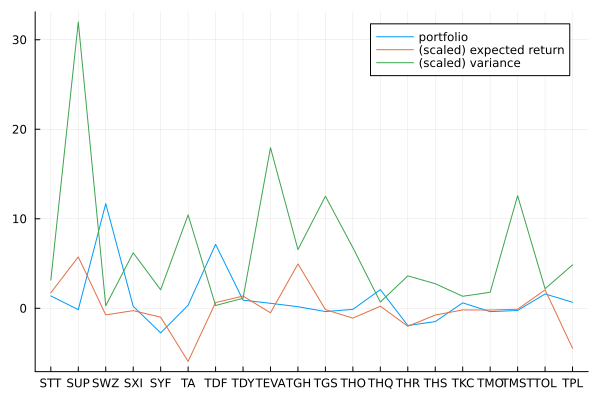

In [11]:
plot( names_stocks, portfolio_opt, labels = "portfolio", xticks = :all )
# you may adjust the scale factor "10" to scale up/down the expected return to make it comparable with 
# the value of the portfolio (*for improved visualization only*).
plot!( names_stocks, 10*bar_R, labels = "(scaled) expected return") 
plot!( names_stocks, 1*[Sigma[i,i] for i in 1:n], labels = "(scaled) variance" )

## Comment: We can see when the variance is much higher than expected return, the portfolio is extremly small, e.g. SUP
##          when the absolute value of (expected return - variance) close to zero, the weight is higher. e.g. SWZ,TDF

The following helper code should plot the comparison of the portfolio vs lambda for you . 

In [12]:
# Calculate the extreme value of lambda from Task 1b
l_exme = ((bar_R'*Sigma^-1)*(bar_R-r1/r2*ones(n)))/(2*(Rd - ((bar_R' * Sigma^-1 * B / r2)*ones(n))))

0.10199795563153463

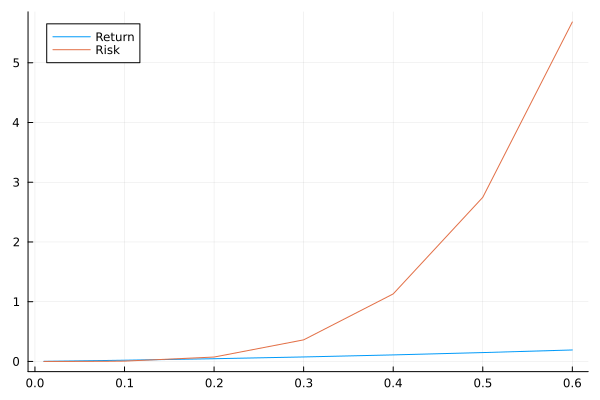

In [13]:
#Please try different value of lambda
#fill in the values of lambda that you want to try. Example: lambda = [0.1;0.2;0.3;0.4;0.5;0.6]
#your code here

# Comment: When lambda go larger, the risk increases exponentially, and the return increases linearly.
lambda = [0.01;0.02;0.04;0.08;0.1;0.2;0.3;0.4;0.5;0.6]
return_l = zeros(length(lambda));
risk_l = zeros(length(lambda));
for i = 1:length(lambda)
    #fill in the closed form solution written in Task 5(a). You can replace l with lambda[i] 
    portfolio = (1/2*lambda[i])*Sigma^-1*(bar_R+((2*lambda[i]*B-r1)/r2)*ones(n));
    return_l[i] = sum(bar_R.*portfolio);
    risk_l[i] = sum( portfolio'*Sigma*portfolio )     
end

plot(lambda,return_l, labels = "Return", xticks = :all )
plot!(lambda,risk_l, labels = "Risk", xticks = :all )

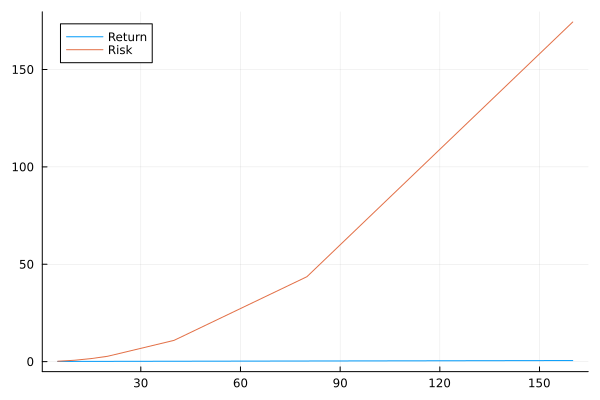

In [14]:
#fill in the values of lambda that you want to try. Example:
# Comment: When budget increases, the risk also goes up exponentially but after a point around 80, the risk goes up linearly.
#          and budget has no effect on return.
lambda = 0.5;
B = [5,10,15,20,40,80,160];
return_l = zeros(length(B));
risk_l = zeros(length(B));
for i = 1:length(B)
    #fill in the closed form solution written in Task 5(a). You can replace l with lambda[i] 
    portfolio = (1/2*lambda)*Sigma^-1*(bar_R+((2*lambda*B[i]-r1)/r2)*ones(20));
    return_l[i] = sum(bar_R.*portfolio);
    risk_l[i] = sum( portfolio'*Sigma*portfolio )     
end

plot(B,return_l, labels = "Return", xticks = :all )
plot!(B,risk_l, labels = "Risk", xticks = :all )

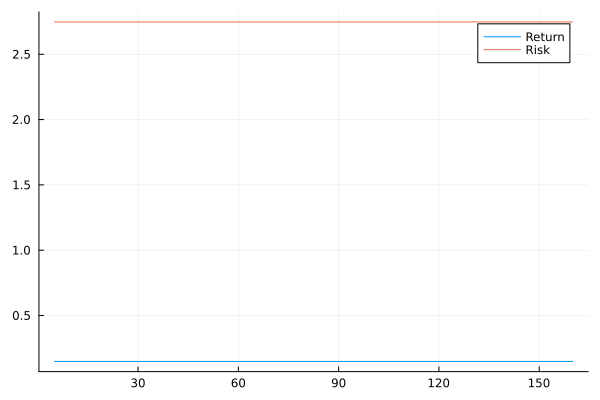

In [15]:
lambda = 0.5;
Rd = [5,10,15,20,40,80,160];
return_l = zeros(length(Rd));
risk_l = zeros(length(Rd));
B = 20
for i = 1:length(Rd)
    #fill in the closed form solution written in Task 5(a). You can replace l with lambda[i] 
    portfolio = (1/2*lambda)*Sigma^-1*(bar_R+((2*lambda*B-r1)/r2)*ones(20));
    return_l[i] = sum(bar_R.*portfolio);
    risk_l[i] = sum( portfolio'*Sigma*portfolio )     
end

plot(Rd,return_l, labels = "Return", xticks = :all )
plot!(Rd,risk_l, labels = "Risk", xticks = :all )

## Task 6 (a): Second-order cone programming solution

For this task, we shall implement the SOCP problem. As usual, we have to define the optimization object and specify a few parameters, as follows. The solver we are going to apply is "ECOS".

In [16]:
# specify the problem parameters - we have calculated the Rd, B, sqrt(Sigma) for you as follows
B = 20; Rd = max(2,sum(bar_R)); C = sqrt(Sigma);

You can program the SOCP problem in the following cell and solve it. Here are a few hints that maybe useful.

- To be compatible with the helper codes in the latter section, please call the decision variable for the portfolio by "x_socp
- You may use for-loop to specify a large number of constraints. 
- To model constraint given in the form of 
$$ \sum_{i=1}^n x_i y_i \geq r $$
withe the $n$-dimensional vectors $x$, $y$. You may do so by
$$ \texttt{@constraint(model, sum( x .* y ) >= r)} $$
where $\texttt{.*}$ denotes an "element-wise" product 
- To model a SOC constraint given in the form
$$ \| Ax + d \| \leq c^\top x + d, $$
you can use
$$ \texttt{ @constraint( m_socp, [c'*x + d; A*x + d] in SecondOrderCone() ) } $$
Essentially, "$\texttt{[c'*x + d; A*x + d]}$" defines a vector whose first element describes the RHS of the SOC constraint, the the remaining elements describe the vector found inside the norm of the SOC constraint. 


In [17]:
# Spliting Sigma into two parts where Sigma_chy^T * Sigma_chy == Sigma

epsilon = 1e-6
Sigma_pd = Sigma + epsilon * I

# Perform the Cholesky decomposition
Sigma_chy = cholesky(Sigma_pd)

# Get the lower triangular matrix
Sigma_chy = Sigma_chy.L

20×20 LowerTriangular{Float64, Matrix{Float64}}:
 1.77561      ⋅           ⋅         …    ⋅         ⋅         ⋅ 
 2.52088     5.06236      ⋅              ⋅         ⋅         ⋅ 
 0.122149    0.0645561   0.515324        ⋅         ⋅         ⋅ 
 0.602725    0.157101    0.0137551       ⋅         ⋅         ⋅ 
 0.738173   -0.190347    0.386915        ⋅         ⋅         ⋅ 
 0.62921     0.434911   -0.55076    …    ⋅         ⋅         ⋅ 
 0.166814   -0.116508    0.0633263       ⋅         ⋅         ⋅ 
 0.0101735   0.0923867   0.127113        ⋅         ⋅         ⋅ 
 2.10541     0.843879   -1.0447          ⋅         ⋅         ⋅ 
 1.3316      0.633676   -0.327161        ⋅         ⋅         ⋅ 
 0.918797    0.17075     0.643415   …    ⋅         ⋅         ⋅ 
 1.30145     0.26142     0.0217943       ⋅         ⋅         ⋅ 
 0.208032   -0.172165    0.199141        ⋅         ⋅         ⋅ 
 1.07986     0.141695    0.0221713       ⋅         ⋅         ⋅ 
 0.900064    0.351612    0.331094        ⋅         ⋅   

In [18]:

# Create the JuMP model with ECOS as the optimizer
m_socp = Model(ECOS.Optimizer)

# Specify the variables
@variable(m_socp, x_socp[1:n])
@variable(m_socp, t)

# Specify the constraints
Sigma_x_socp = [sum(Sigma_chy[i, j] * x_socp[j] for j in 1:n) for i in 1:n]
@constraint(m_socp, [t; 0.5 * Sigma_x_socp] in SecondOrderCone())
@constraint(m_socp, sum(x_socp) <= B)
@constraint(m_socp, sum(x_socp .* bar_R) >= Rd)
@constraint(m_socp, x_socp.>= 0)

# Specify the objective function
@objective(m_socp, Min, t)

# Solve the SOCP problem
optimize!(m_socp)

# You can retrieve the optimal solution and value as follows:
optimal_x_socp = value.(x_socp)
optimal_t = value(t)
optimal_value = objective_value(m_socp)


ECOS 2.0.8 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -1.653e+01  +9e+01  2e-01  1e-01  1e+00  4e+00    ---    ---    1  1  - |  -  - 
 1  +2.916e+00  -6.272e-01  +3e+01  5e-02  2e-02  4e-01  1e+00  0.7520  1e-01   1  2  2 |  0  0
 2  +3.493e+00  +2.280e+00  +1e+01  2e-02  5e-03  2e-01  4e-01  0.6822  8e-02   2  2  2 |  0  0
 3  +3.111e+00  +2.687e+00  +4e+00  6e-03  2e-03  7e-02  2e-01  0.9848  3e-01   2  1  1 |  0  0
 4  +3.201e+00  +3.060e+00  +1e+00  2e-03  6e-04  2e-02  5e-02  0.7075  7e-02   2  1  1 |  0  0
 5  +3.278e+00  +3.205e+00  +6e-01  1e-03  3e-04  1e-02  3e-02  0.7984  4e-01   2  2  2 |  0  0
 6  +3.276e+00  +3.254e+00  +2e-01  3e-04  9e-05  4e-03  8e-03  0.8925  2e-01   2  1  1 |  0  0
 7  +3.285e+00  +3.282e+00  +2e-02  4e-05  1e-05  4e-04  1e-03  0.9183  5e-02   2  1  2 |  0  0
 8  +3.285e+00  +3.285e+00  +1e-03  2e-06  5e-

3.2846781562501324

In [19]:
#The following helper code compute the Downside Risk Violation Probability and Average Downside Risk Violation for you.
downsiderisk( (JuMP.value.(x_socp)), T, stocks_retur,bar_R );

Prob. of Downside Risk Violation = 0.52, Amt. of Downside Risk Violation = 4.305527693870385

## Task 6(b): Mixed Integer Programming Solution

For this task, we shall implement the MIP program formulated in Task 2. As usual, we have to define the optimization object and specify a few parameters, as follows. The solver we are going to apply is "GLPK" as we have introduced during the lecture.

In [20]:
# This function responsible for return Rt in a specific time
# The actual reture of n stocks on a specific day i
function R(i,matrix)
    return matrix[i,:]
end

R (generic function with 1 method)

In [21]:
# specify the problem parameters
# Tip: If you find that the solver takes too long time on optimization the problem, you can try a smaller M.
# Notice that reducing M can speedup the solver, but may result in an "infeasible solution" error
# Initialization
B = 20; Rd = max(2,sum(bar_R)); M = 50;

In [22]:
# specify the JuMP model with GLPK as the optimizer
m_milp = Model(GLPK.Optimizer);
set_optimizer_attribute(m_milp, "msg_lev", GLPK.GLP_MSG_ALL);

# your code to specify the MIP here
@variable(m_milp, x_milp[1:n])
@variable(m_milp, z[1:50], Bin)

# Constraints for the z variable
for t = 1:50
    @constraint(m_milp, x_milp' * (bar_R .- R(t, stocks_retur)) - M * z[t] <= 0)
    @constraint(m_milp, -x_milp' * (bar_R .- R(t,stocks_retur)) - M * (1 - z[t]) <= 0)
end

# Additional constraints
@constraint(m_milp, Rd - sum(x_milp .* bar_R) <= 0)
@constraint(m_milp, sum(x_milp) <= B)
@constraint(m_milp, 0 .<= x_milp)

# Objective function
@objective(m_milp, Min, sum(z))

# Solve the MILP problem
optimize!(m_milp)

# Retrieve the optimal solution and value
optimal_x_milp = value.(x_milp)
optimal_value = objective_value(m_milp)

GLPK Simplex Optimizer 5.0
122 rows, 70 columns, 2160 non-zeros
      0: obj =   0.000000000e+00 inf =   2.000e+00 (1)
     57: obj =   4.954200349e+00 inf =   0.000e+00 (0)
*    78: obj =   3.667612175e+00 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
GLPK Integer Optimizer 5.0
122 rows, 70 columns, 2160 non-zeros
50 integer variables, all of which are binary
Integer optimization begins...
Long-step dual simplex will be used
+    78: mip =     not found yet >=              -inf        (1; 0)
+ 13040: >>>>>   1.900000000e+01 >=   1.100000000e+01  42.1% (1596; 429)
+ 17861: >>>>>   1.700000000e+01 >=   1.200000000e+01  29.4% (1937; 754)
+ 52687: >>>>>   1.600000000e+01 >=   1.400000000e+01  12.5% (4290; 2949)
+ 76636: >>>>>   1.500000000e+01 >=   1.500000000e+01   0.0% (3332; 7000)
+ 76636: mip =   1.500000000e+01 >=     tree is empty   0.0% (0; 18307)
INTEGER OPTIMAL SOLUTION FOUND


15.0

In [23]:
downsiderisk( (JuMP.value.(x_milp)), T, stocks_retur,bar_R );

Prob. of Downside Risk Violation = 0.4, Amt. of Downside Risk Violation = 6.5867005571852495

## Task 6(c): Linear Programming Solution

For this task, we shall implement the LP program formulated in Task 3. As usual, we have to define the optimization object and specify a few parameters, as follows. The solver we are going to apply is "GLPK" as we have introduced during the lecture.

#### LP Solution

In [24]:
# specify the problem parameters
B = 20;  Rd = max(2,sum(bar_R))

2.0

In [25]:
m_lp = Model(GLPK.Optimizer)
set_optimizer_attribute(m_lp, "msg_lev", GLPK.GLP_MSG_ALL)

@variable(m_lp, x_lp[1:n])
@variable(m_lp, z[1:T])
# @variable(m_lp, y[1:n])

for i = 1:T
    @constraint(m_lp, z[i] >= (x_lp' * (bar_R - R(i,stocks_retur))))
end

# for i = 1:n
#     @constraint(m_lp,y[i]>=x_lp[i])
#     @constraint(m_lp,y[i]>=-x_lp[i])
# end

@constraint(m_lp, sum(x_lp .* bar_R) >= Rd)
@constraint(m_lp, sum(x_lp) <= B)
@constraint(m_lp, -sum(x_lp) <= B)
@constraint(m_lp, z .>= 0)
@constraint(m_lp, x_lp .>= 0)
# @constraint(m_lp, y .>=0 )
@objective(m_lp, Max, -(1/T)*sum(z))

optimize!(m_lp)

# You can retrieve the optimal solution and value as follows:
optimal_x_lp = value.(x_lp)
optimal_value = objective_value(m_lp) 

GLPK Simplex Optimizer 5.0
123 rows, 70 columns, 1180 non-zeros
      0: obj =  -0.000000000e+00 inf =   2.000e+00 (1)
    109: obj =  -4.066517825e+00 inf =   0.000e+00 (0) 1
*   129: obj =  -3.667612175e+00 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND


-3.6676121752506425

In [26]:
downsiderisk( (JuMP.value.(x_lp)), T, stocks_retur,bar_R );

Prob. of Downside Risk Violation = 0.46, Amt. of Downside Risk Violation = 3.6676121752506434

## Task 6(d): Plotting the portfolios found

Given that you have programmed and executed the optimization problems correctly, the following helper code shall plot the portfolios nicely for you. 

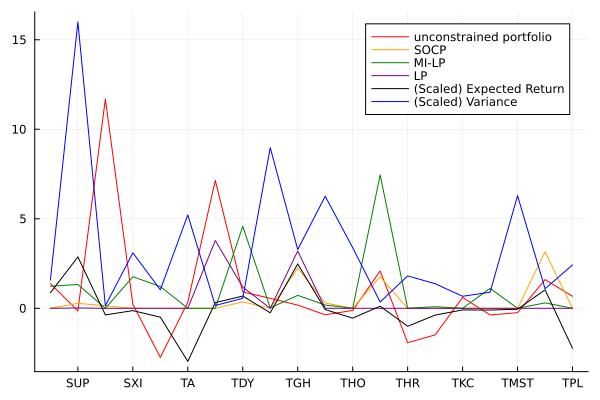

In [27]:
plot( names_stocks, portfolio_opt,lc=:red, labels = "unconstrained portfolio" )
plot!(names_stocks, JuMP.value.(x_socp),lc=:orange, labels = "SOCP" )
plot!( names_stocks, JuMP.value.(x_milp),lc=:green, labels = "MI-LP")
plot!( names_stocks, JuMP.value.(x_lp),lc=:purple, labels = "LP")
plot!( names_stocks, 5*bar_R,lc=:black, labels ="(Scaled) Expected Return")
plot!( names_stocks, 0.5*[Sigma[i,i] for i in 1:n],lc=:blue, labels ="(Scaled) Variance")
plot!(legend=:topright)

## Task 7: Evaluating the Solution on Testing Set

Again, provided that you have programmed and executed the optimization problems correctly, the following helper code shall compute the Sharpe ratio and other benchmarks for you.

In [28]:
Perfor_Opt = performance_testdata( path_subgroup, portfolio_opt[:,1], 796,bar_R/100 );

Sharpe Ratio = 0.02343358099992304, Prob. of Downside Risk Violation = 0.4849246231155779, Amt. of Downside Risk Violation = 0.0701672525276027, Return = 0.004655109825124278, Portfo Value = 19.999999999999996

In [29]:
Perfor_SOCP = performance_testdata( path_subgroup, (JuMP.value.(x_socp)), 796,bar_R/100 );

Sharpe Ratio = 0.051189809978188436, Prob. of Downside Risk Violation = 0.5414572864321608, Amt. of Downside Risk Violation = 0.060790655352844364, Return = 0.007643299331346252, Portfo Value = 8.233157652168526

In [30]:
Perfor_IP = performance_testdata( path_subgroup, JuMP.value.(x_milp), 796,bar_R/100 );

Sharpe Ratio = 0.022988276721965968, Prob. of Downside Risk Violation = 0.5201005025125628, Amt. of Downside Risk Violation = 0.09699919210348908, Return = 0.0058911741857432705, Portfo Value = 20.0

In [31]:
Perfor_LP = performance_testdata( path_subgroup, JuMP.value.(x_lp) , 796,bar_R/100 );

Sharpe Ratio = 0.07241984008144643, Prob. of Downside Risk Violation = 0.5703517587939698, Amt. of Downside Risk Violation = 0.05266882916962284, Return = 0.009120936663323025, Portfo Value = 8.183052008898677

# Part II - Competitive Task

In the compulsory task, we shall implement a projected gradient method (or any other gradient-type algorithm) for the approximated Portfolio optimization problem. 

We shall consider the portfolio optimization problem on the full dataset. For this, let us first load the data with the following helper code.

In [2]:
# load the full data set!
files = glob( "*_train.csv", "./ftec_project_files/");
dfs = DataFrame.( CSV.File.( files ) );
T = 799; n = length(dfs);
stocks_retur_full = zeros(T,n);

for i = 1:n
    # compute the realized return R_i(t)
    stocks_retur_full[:,i] = (dfs[i].Close-dfs[i].Open) ./ dfs[i].Open;
end

names_stocks_full = [ dfs[i].Name[1] for i in 1:n ];

# calculate r_i and Sigma
bar_R_full = [ mean( stocks_retur_full[:,i] ) for i in 1:length(dfs) ];
Sigma_full = [ mean( (stocks_retur_full[:,i].-bar_R_full[i]).*(stocks_retur_full[:,j].-bar_R_full[j]) ) for i=1:n, j=1:n ];

Notice that "bar_R_full" is the expected return for all the $n=699$ stocks considered, and "Sigma_full" is the $699 \times 699$ covariance matrix for them. 

## Task 8: Implementing a Customized Solver for the approximated problem

You may wish to write a few helper functions to compute the objective values, the gradient vector, the projection into the box constraint, etc.. to help you with implementing the customized solver. Some useful syntax are as follows:

- For a nonlinear function $h(z)$ (such as the Huber function) on a scalar $z$. Suppose that $x$ is an $n$-dimensional vector, to create the vector 
$$ [h(x)]_i = h(x_i) $$
you may use the syntax
$$ \texttt{h.(x)} $$
where the "." after "h" broadcasts the function to every elements of the vector. 

In [3]:
# your code/functions here - below is a recommendation on what functions you may develop to help yourself

# define the Huber functions & its derivative 
function huber_fct(x,delta)
    
    if 0 <= x <= delta
        return x^2/2*delta
    end
        
    if x > delta
        return x - 0.5 * delta
    end
    
    if x < 0
        return 0
    end
    
end


function derivative_huber_fct(x, delta)
    if 0 <= x <= delta
        return x / delta
    elseif x > delta
        return 1
    else
        return 0
    end
end

function normalize(data)
    data_min = minimum(data)
    data_max = maximum(data)
    return (data .- data_min) ./ (data_max - data_min + 1e-5)
end

function standardize(data)
    data_mean = mean(data)
    data_std = std(data)
    return (data .- data_mean) ./ (data_std + 1e-5)
end


# objective function and its gradient 
function obj_fct( x, stocks_retur_full, bar_R, upsilon, gamma, delta )
    result = 0
    T,n = size(stocks_retur_full)
    Rd = sum(bar_R)
    B = 1000
    for i=1:T
        result = result + huber_fct(x' * (bar_R - R(i, stocks_retur_full)), delta) + upsilon*(Rd - sum(x .* bar_R)) + gamma*(sum(abs.(x)) - B)
    end
    return result
end

#Given the current portfolio, output a n-dimentional vector of its gradient

function grd_obj(x, stocks_retur_full, bar_R, upsilon, gamma, delta)
    T, n = size(stocks_retur_full)
    Rd = sum(bar_R)
    result = zeros(n)

    for t = 1:T
        huber_derivative = derivative_huber_fct.((x' * bar_R .- x' * stocks_retur_full[t, :]), delta) .* (bar_R .- stocks_retur_full[t, :])
        f1_derivative = -sum(bar_R)
        f2_derivative = sum(sign.(x))
        result = result .+ huber_derivative .+ f1_derivative .+ f2_derivative 
    end

    return result
end

# projection into [v,u]
function projection_box( x, v, u )
    result = zeros(length(x))
    for i=1:length(x)
        if x[i] < v
            result[i] = v
        elseif x[i] > u
            result[i] = u
        else
            result[i] = x[i]
        end
    end
    return result
end

function sigmoid(x, alpha, beta, bar_R_full, stocks_retur_full)
    T, n = size(stocks_retur_full)
    result = 0
    for i = 1:T
        result += 1 / (1 + exp(-alpha * (x' * (bar_R_full .- stocks_retur_full[i, :]) .+ beta)))
    end
    return result
end

function grad_sigmoid(x, alpha, beta, bar_R_full, stocks_retur_full)
    T, n = size(stocks_retur_full)
    grad_result = zeros(n)
    
    for i = 1:T
        sigm = 1 / (1 + exp(-alpha * (x' * (bar_R_full .- stocks_retur_full[i, :]) .+ beta)))
        grad_term = sigm * (1 - sigm) * alpha * (bar_R_full .- stocks_retur_full[i, :])
        grad_result .+= grad_term
    end
    
    return grad_result
end

function CG(x,l,u) # Conditional-gradient
    if x < 0
        return u
    else
        return l
    end
end

CG (generic function with 1 method)

In [34]:
# Projected-gradient decending, with standardize 

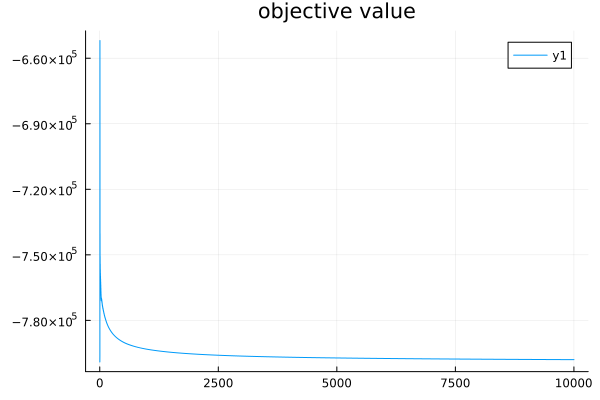

In [35]:
# set the parameters in the optimization problem - below are some "suggested values" only, feel free to 
# tune them to achieve better performance when needed
upsilon = 1; gamma = 1; delta = 1;
T,n = size(stocks_retur_full)
# initialize the algorithm
x_gd = zeros(n); 

store_obj = []
push!(store_obj, obj_fct(x_gd,stocks_retur_full,bar_R_full,upsilon,gamma,delta)) 

for iteration_no = 1 : 5000 
    x_gd = projection_box(x_gd .- 1/iteration_no .* standardize(grd_obj(x_gd,stocks_retur_full,bar_R_full,upsilon,gamma,delta)),-10,10)
    push!(store_obj, obj_fct(x_gd,stocks_retur_full,bar_R_full,upsilon,gamma,delta) ) # replace "..." with the function you wrote for computing the objective val.
end

plot( store_obj , title = "objective value")

The following helper code return you the Downside Risk Violation Probability and Average Downside Risk Violation on training data.

In [36]:
downsiderisk( x_gd, T, stocks_retur_full,bar_R_full )

Prob. of Downside Risk Violation = 0.6708385481852316, Amt. of Downside Risk Violation = 7.563042108442833e-5

1×2 Matrix{Float64}:
 0.670839  7.56304e-5

In [37]:
perfor_GD = performance_testdata( "./ftec_project_files/", x_gd , 447, bar_R_full );

Sharpe Ratio = -0.08504524198726834, Prob. of Downside Risk Violation = 0.5615212527964206, Amt. of Downside Risk Violation = 0.0002598394250362843, Return = -4.9077509932355576e-5, Portfo Value = 0.0012509529232266258

In [38]:
# Conditional-gradient 

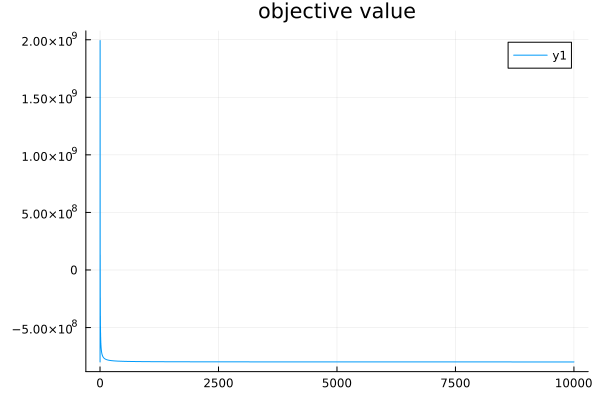

In [39]:
# set the parameters in the optimization problem - below are some "suggested values" only, feel free to 
# tune them to achieve better performance when needed
upsilon = 1000; gamma = 1000; delta = 0.1; #0.8
T,n = size(stocks_retur_full)
# initialize the algorithm
x_gd = zeros(n); 

store_obj = []
push!(store_obj, obj_fct(x_gd,stocks_retur_full,bar_R_full,upsilon,gamma,delta)) 

for iteration_no = 1 : 10000 
    a = CG.(grd_obj(x_gd,stocks_retur_full,bar_R_full,upsilon,gamma,delta),-5,5)
    x_gd = (1 - 2/(iteration_no+1)) .* x_gd .+ 2/(iteration_no+1) .* a
    push!(store_obj, obj_fct(x_gd,stocks_retur_full,bar_R_full,upsilon,gamma,delta) ) # replace "..." with the function you wrote for computing the objective val.
end

plot( store_obj , title = "objective value")

The following code computes the sharpe ratio, return, downside risk violation probability and average downside risk violation which will be used to calculate your score for the competitive task!

In [40]:
downsiderisk( x_gd, T, stocks_retur_full,bar_R_full )

Prob. of Downside Risk Violation = 0.4793491864831039, Amt. of Downside Risk Violation = 0.0011303779232325936

1×2 Matrix{Float64}:
 0.479349  0.00113038

In [41]:
perfor_GD = performance_testdata( "./ftec_project_files/", x_gd , 447, bar_R_full );

Sharpe Ratio = -0.0006024585054972592, Prob. of Downside Risk Violation = 0.4742729306487696, Amt. of Downside Risk Violation = 0.0011643920798242822, Return = -1.8592059986810802e-6, Portfo Value = 0.3494650534946495

In [42]:
# Sigmoid

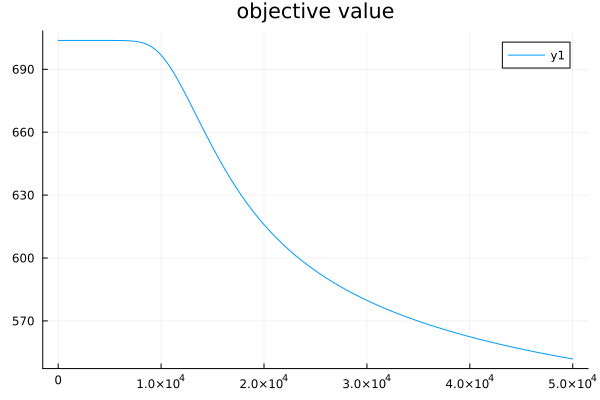

In [43]:
# set the parameters in the optimization problem - below are some "suggested values" only, feel free to 
# tune them to achieve better performance when needed
upsilon = 2000; gamma = 2000; delta = 0.8;
T,n = size(stocks_retur_full)
# initialize the algorithm
x_gd = zeros(n); 

store_obj = []
push!(store_obj, sigmoid(x_gd,1,2,bar_R_full,stocks_retur_full))

for iteration_no = 1 : 50000
    # your code here
    x_gd = projection_box(x_gd .- 1/iteration_no .* grad_sigmoid(x_gd,1,2,bar_R_full,stocks_retur_full),-10,10)
    push!(store_obj, sigmoid(x_gd,1,2,bar_R_full,stocks_retur_full) ) # replace "..." with the function you wrote for computing the objective val.
end

plot( store_obj , title = "objective value")

In [44]:
downsiderisk( x_gd, T, stocks_retur_full,bar_R_full )

Prob. of Downside Risk Violation = 0.4780976220275344, Amt. of Downside Risk Violation = 1.6229336652417776

1×2 Matrix{Float64}:
 0.478098  1.62293

In [45]:
perfor_GD = performance_testdata( "./ftec_project_files/", x_gd , 447, bar_R_full );

Sharpe Ratio = 0.005776287900202754, Prob. of Downside Risk Violation = 0.4899328859060403, Amt. of Downside Risk Violation = 1.617456252357288, Return = 0.024627464603099194, Portfo Value = 380.7747651710585

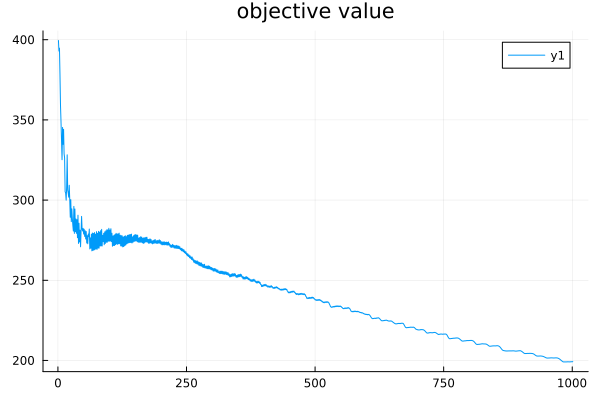

In [46]:
# set the parameters in the optimization problem - below are some "suggested values" only, feel free to 
# tune them to achieve better performance when needed
upsilon = 1; gamma = 1; delta = 0.1; #0.8
T,n = size(stocks_retur_full)
# initialize the algorithm
x_gd = zeros(n); 

store_obj = []
push!(store_obj, sigmoid(x_gd,60,0,bar_R_full,stocks_retur_full)) 

for iteration_no = 1 : 1000
    a = CG.(grad_sigmoid(x_gd,60,0,bar_R_full,stocks_retur_full),-1,1)
    x_gd = (1 - 2/(iteration_no+1)) .* x_gd .+ 2/(iteration_no+1) .* a
    push!(store_obj, sigmoid(x_gd,60,0,bar_R_full,stocks_retur_full) ) # replace "..." with the function you wrote for computing the objective val.
end

plot( store_obj , title = "objective value")

In [47]:
downsiderisk( x_gd, T, stocks_retur_full,bar_R_full )

Prob. of Downside Risk Violation = 0.22778473091364204, Amt. of Downside Risk Violation = 0.08556660421925164

1×2 Matrix{Float64}:
 0.227785  0.0855666

In [48]:
perfor_GD = performance_testdata( "./ftec_project_files/", x_gd , 447, bar_R_full );

Sharpe Ratio = 0.001886079360915339, Prob. of Downside Risk Violation = 0.46308724832214765, Amt. of Downside Risk Violation = 0.08258721102507735, Return = 0.0004473201916991042, Portfo Value = 17.801754245754243